#                    Best Doctor

## Patient Review 

In [340]:
import pandas as pd
patient_review = pd.read_excel('Patient_Review.xlsx')
print(patient_review.columns)
patient_review

Index(['Name', 'Ethical_Behaviour', 'Review'], dtype='object')


,Name,Ethical_Behaviour,Review
0,Dr. Aadharsh Sharma,5,Nice Treatment
1,Dr. Aadharsh Sharma,4,Very Profesional
2,Dr. Aadharsh Sharma,4,Good Experience
3,Dr. Aadharsh Sharma,4,Very nice
4,Dr. Abhishek Singhal,3,ok..
...,...,...,...
253,Dr. Yamini,3,Good Experience
254,Dr. Yaswanth,5,Good Treatment
255,Dr. Yaswanth,4,"was a kind, competent, and excellent diagnosti..."
256,Dr. Yaswanth,5,Good Treatment


# Sentiment Analysis on Patient Review 

In [341]:
from textblob import TextBlob

In [342]:
name,sentiment,eth=list(),list(),list()
for group, frame in patient_review.groupby('Name'):
    x=list()
    for i in frame['Review']:
        blob = TextBlob(i)
    l,m=0,0
    for sentence in blob.sentences:
        l+=sentence.sentiment.polarity 
    for i in frame['Ethical_Behaviour']: 
        m+=int(i)
    name.append(group)
    sentiment.append(l)
    eth.append(m/len(frame))
df = pd.DataFrame({})
df['Name'],df['Sentiment'],df['Ethical_Behaviour']=pd.Series(name),pd.Series(sentiment),pd.Series(eth)
df

,Name,Sentiment,Ethical_Behaviour
0,Dr. Aadharsh Sharma,0.780000,4.25
1,Dr. Abhishek Singhal,0.400000,3.50
2,Dr. Abijith,1.000000,4.00
3,Dr. Abir Rajvansh,1.000000,4.50
4,Dr. Addline,1.000000,4.50
...,...,...,...
100,Dr. Vikram Shah,0.400000,4.50
101,Dr. Vivan,0.600000,4.00
102,Dr. Vividha Chakraborthy,0.700000,3.00
103,Dr. Yamini,0.700000,3.50


In [343]:
rank_list = pd.DataFrame({})
rank_list['Name']=df['Name']
rank_list['Patient_Review']=df['Sentiment']*0.6+df['Ethical_Behaviour']*0.4
rank_list
rank_list1=rank_list.copy()

# Top 20 Doctors Based on Patient Review

In [344]:
rank_list1.sort_values(by=['Patient_Review'],inplace=True,ascending=False)
rank_list1.index = np.arange(1, len(df) + 1)
rank_list1[:20]

,Name,Patient_Review
1,Dr. Anasuya,3.0680
2,Dr. Pearl Ruby,2.6000
3,Dr. Indraja,2.5000
4,Dr. M Jayanthi,2.4200
5,Dr. Abir Rajvansh,2.4000
6,Dr. Addline,2.4000
7,Dr. Barka,2.4000
8,Dr. Ajay Singania,2.4000
9,Dr. Nisha Joseph,2.4000
10,Dr. Arnav singh,2.4000


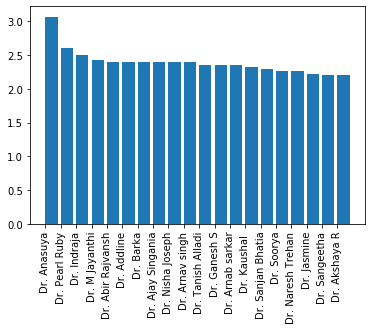

In [345]:
import matplotlib.pyplot as plt
plt.bar(rank_list1['Name'][:20],rank_list1['Patient_Review'][:20],align='edge')
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(90)
plt.show()

# Basic Factors

In [346]:
doctor_factors = pd.read_excel('Doctor_Info.xlsx')
doctor_factors

,Name,Year_exp,Patient_visits,Availability,Department,Special_Achievements,Awards_National,Awards_International
0,Dr. Aadharsh Sharma,20,32,6,Cardiologist,2,0,0
1,Dr. Abhishek Singhal,6,13,8,Gynacologist,0,0,0
2,Dr. Abijith,9,7,9,Allergist/Immunologist,0,1,0
3,Dr. Abir Rajvansh,6,45,5,Anesthesiologist,0,0,0
4,Dr. Addline,12,34,10,Cardiologist,1,0,0
...,...,...,...,...,...,...,...,...
100,Dr. Vikram Shah,9,24,4,Cardiologist,3,0,2
101,Dr. Vivan,10,6,8,Rheumatologist,0,1,0
102,Dr. Vividha Chakraborthy,7,68,4,Gynacologist,0,0,0
103,Dr. Yamini,8,84,4,Surgeon,3,0,0


In [347]:
rank_list.index = np.arange(0, len(df))
rank_list['Basic_Attributes']=doctor_factors['Year_exp']*0.35+doctor_factors['Patient_visits']*0.4+doctor_factors['Availability']*0.25
rank_list['Basic_Attributes']=(rank_list['Basic_Attributes']*10)/max(rank_list['Basic_Attributes'])

# Top 20 Doctors Based On Basic Factors

In [348]:
import numpy as np
rank_list2=rank_list.copy()
rank_list2.sort_values(by=['Basic_Attributes'],inplace=True,ascending=False)
rank_list2.index = np.arange(1, len(df) + 1)
rank_list2[:20]

,Name,Patient_Review,Basic_Attributes
1,Dr. Ganesh S,2.3600,10.000000
2,Dr. Sirisha,1.6900,9.726027
3,Dr. Santosh R,2.0200,9.676214
4,Dr. Yamini,1.8200,9.315068
5,Dr. Sravani,1.7200,9.290162
6,Dr. Sangeetha,2.2000,9.178082
7,Dr. Madhumitha Z,1.2000,9.066002
8,Dr. Arnab sarkar,2.3460,8.642590
9,Dr. Tanish Alladi,2.3600,8.430884
10,Dr. Mehaboob,2.0200,8.306351


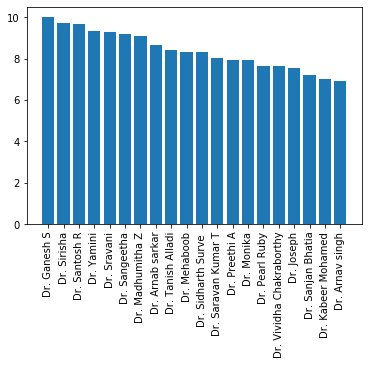

In [349]:
plt.bar(rank_list2['Name'][:20], rank_list2['Basic_Attributes'][:20])
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(90) 
plt.show()

# Extra Attributes

In [360]:
rank_list3=pd.DataFrame({})
rank_list3['Name']=doctor_factors['Name']
rank_list3['Special']=(doctor_factors['Special_Achievements']*0.4)+(doctor_factors['Awards_National']*0.2)+(doctor_factors['Awards_International']*0.4)
rank_list3.sort_values(by=['Special'],inplace=True,ascending=False)
rank_list3[:20]

,Name,Special
74,Dr. Santosh R,2.4
100,Dr. Vikram Shah,2.0
103,Dr. Yamini,1.2
60,Dr. Pranay,1.2
71,Dr. Sangeetha,1.2
94,Dr. Suwetha A,1.2
0,Dr. Aadharsh Sharma,0.8
87,Dr. Sohel Rehman,0.8
21,Dr. Barath,0.8
83,Dr. Sidharth Surve,0.8


In [361]:
rank_list3.sort_values(by=['Name'],inplace=True)
rank_list.sort_values(by=['Name'],inplace=True)
rank_list['Special']=rank_list3['Special']

# Top 20 Doctors            (All factors Considered)

In [362]:
rank_list['Performance']=rank_list['Patient_Review']*0.20+rank_list['Basic_Attributes']*0.50+rank_list['Special']*0.30
rank_list.sort_values(by=['Name'],inplace=True)
rank_list['Department']=doctor_factors['Department']
rank_list.sort_values(by=['Performance'],inplace=True,ascending=False)
rank_list.index = np.arange(1, len(df) + 1)
rank_list[:20]

,Name,Patient_Review,Basic_Attributes,Special,Performance,Department
1,Dr. Ganesh S,2.3600,10.000000,0.2,5.532000,Allergist/Immunologist
2,Dr. Santosh R,2.0200,9.676214,0.0,5.242107,Gynacologist
3,Dr. Sirisha,1.6900,9.726027,0.0,5.201014,Gastroenterologist
4,Dr. Yamini,1.8200,9.315068,0.4,5.141534,Cardiologist
5,Dr. Sangeetha,2.2000,9.178082,0.0,5.029041,Anesthesiologist
6,Dr. Madhumitha Z,1.2000,9.066002,0.8,5.013001,Radiologist
7,Dr. Sravani,1.7200,9.290162,0.0,4.989081,Pediatrician
8,Dr. Arnab sarkar,2.3460,8.642590,0.4,4.910495,Oncologist
9,Dr. Tanish Alladi,2.3600,8.430884,0.0,4.687442,Psychiatrist
10,Dr. Mehaboob,2.0200,8.306351,0.2,4.617176,Podiatrist


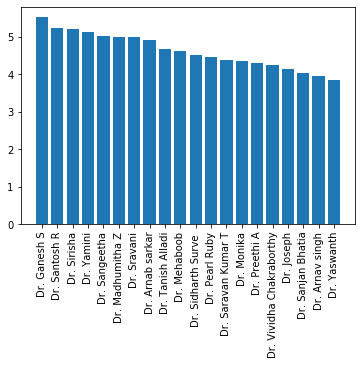

In [365]:
plt.bar(rank_list['Name'][:20], rank_list['Performance'][:20])
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(90) 
plt.show()

# Best Department Analysis

In [354]:
g,av=list(),list()
for group, frame in rank_list.groupby('Department'):
    avg=np.average(frame['Performance'])
    g.append(group)
    av.append(avg) 

dept_contribution = pd.DataFrame({})
dept_contribution['Department'],dept_contribution['Performance']=pd.Series(g),pd.Series(av)
dept_contribution.sort_values(by=['Performance'],inplace=True,ascending=False)
dept_contribution.index = np.arange(1, len(dept_contribution) + 1)
dept_contribution

,Department,Performance
1,Surgeon,3.602762
2,Gynacologist,3.273851
3,Pulmonologist,3.146421
4,Cardiologist,3.104962
5,Ophthalmologist,3.003344
6,Allergist/Immunologist,2.809575
7,Pediatrician,2.794092
8,Endocrinologist,2.721986
9,Psychiatrist,2.707807
10,Nephrologist,2.682287


## Graph

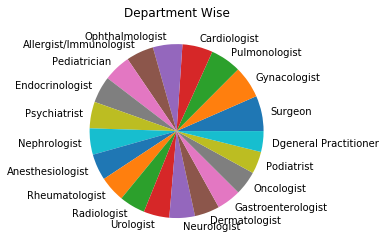

<function matplotlib.pyplot.title(label, fontdict=None, loc='center', pad=None, **kwargs)>

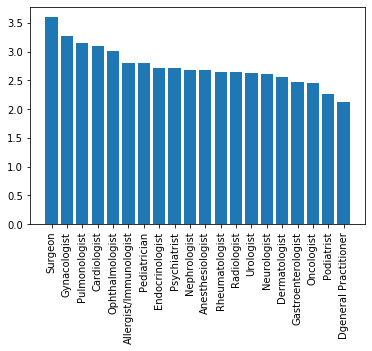

In [355]:
plt.pie(dept_contribution['Performance'], labels=dept_contribution['Department'])
plt.title('Department Wise')
plt.show()
plt.bar(dept_contribution['Department'], dept_contribution['Performance'])
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(90) 
plt.title